In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%run "Common setup.ipynb"

In [3]:
RC = mk.RecordCollection("tmp/rest_filtered_corpora.txt")

Plot publication and keyword trend

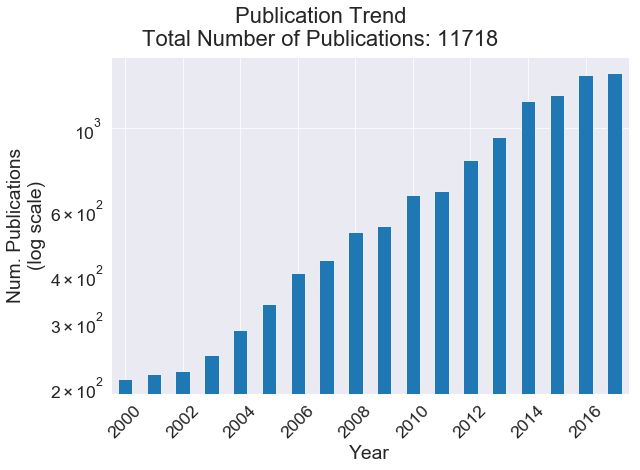

In [4]:
wos_plot.plot_pub_trend(RC, title='Publication Trend', save_plot_fn='figs/pubtrend_2000-2017.png')

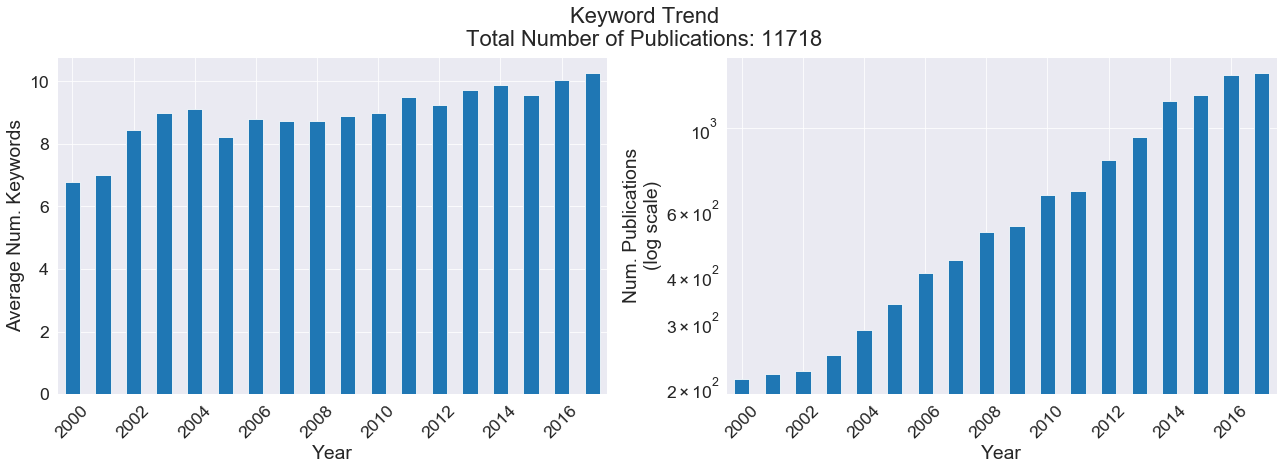

In [6]:
# Plot out the keyword trend. Can save the plot as an image if you give it a file location (will be saved in PNG format)
wos_plot.plot_kw_trend(RC, title='Keyword Trend', save_plot_fn="figs/kw_trend_2000-2017.png")

<hr>

Identifying the top journals and papers by publication and citation

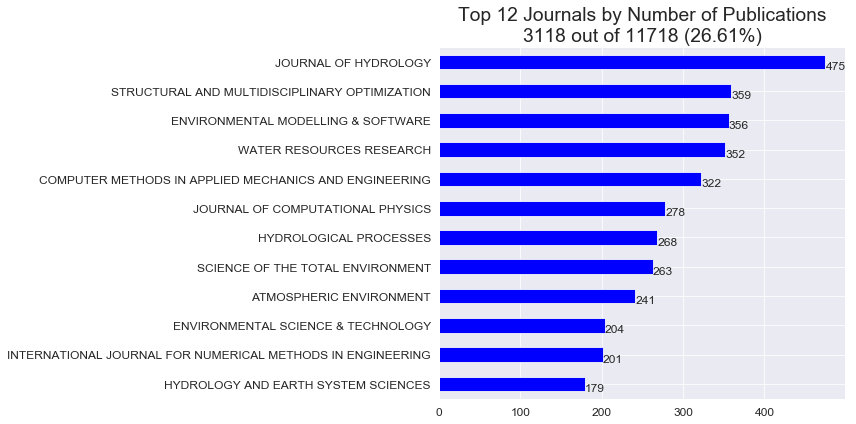

In [5]:
wos_plot.plot_pubs_per_journal(RC, top_n=12, annotate=True, show_stats=True, save_plot_fn='figs/journal_pubs_2000-2017.png')

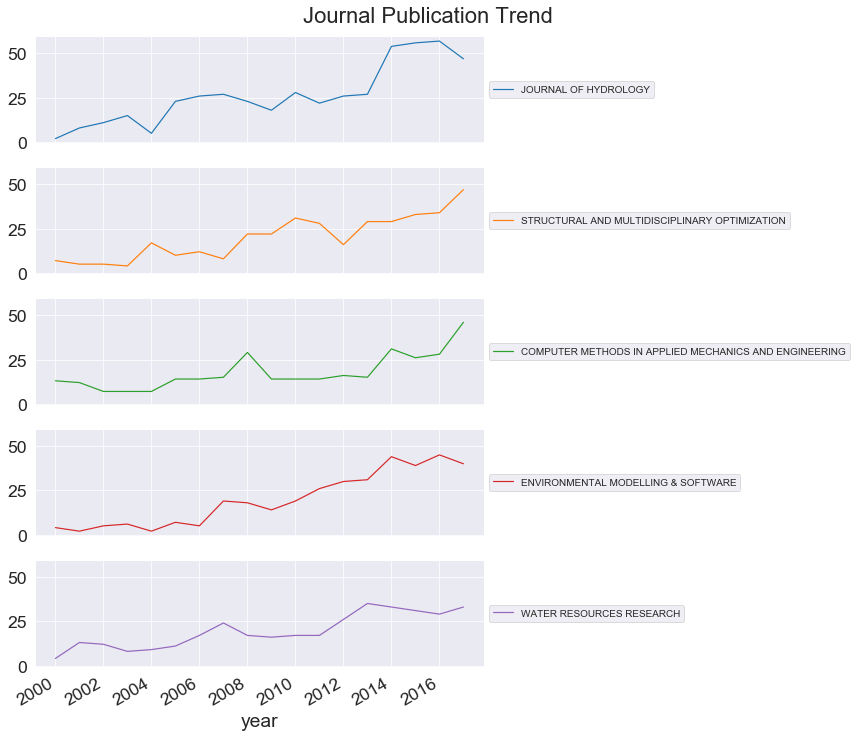

In [7]:
wos_plot.plot_journal_pub_trend(RC, top_n=5, save_plot_fn='figs/journal_pub_trend_2000-2017.png')

In [8]:
journals_of_interest = ['Structural and Multidisciplinary Optimization'.upper(), 'Computer Methods in Applied Mechanics and Engineering'.upper(),
                       'Water Resources Research'.upper(), 'Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper()]
pubs_for_journals = wosis.find_pubs_by_journal(RC, journals_of_interest)

In [9]:
import glob

data_dir = "tmp"  # Using the temporary data directory
wos_config = wosis.load_config("config.yml")

# Get citations for each paper
paper_citations_per_journal = {}
for pubs in pubs_for_journals:
    fn = '{}/{}_citations.csv'.format(data_dir, pubs)
    file_list = glob.glob(fn)
    if not file_list:
        # Get citation data if not already downloaded and saved
        paper_citations_per_journal[pubs] = wosis.get_num_citations(pubs_for_journals[pubs], wos_config)
        paper_citations_per_journal[pubs].to_csv(fn)
    else:
        # If available, load the saved data
        paper_citations_per_journal[pubs] = pd.read_csv(fn)

In [10]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection = pd.DataFrame(columns=cols_of_interest)
for journal, df in paper_citations_per_journal.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    collection = collection.append(df[cols_of_interest][0:10], ignore_index=True)

In [11]:
top_cited_in_top_journals = collection.sort_values('citations', ascending=False)

top_cited_in_top_journals.head(10)

,AU,year,title,journal,citations,DOI link
0,"Kirchner, James W.",2009,Catchments as simple dynamical systems: Catchm...,WATER RESOURCES RESEARCH,279,https://dx.doi.org/10.1029/2008WR006912
1,"Brun, R|Reichert, P|Kunsch, HR",2001,Practical identifiability analysis of large en...,WATER RESOURCES RESEARCH,278,https://dx.doi.org/10.1029/2000WR900350
2,"Pappenberger, F.|Beven, K. J.",2006,Ignorance is bliss: Or seven reasons not to us...,WATER RESOURCES RESEARCH,243,https://dx.doi.org/10.1029/2005WR004820
3,"Thiemann, M|Trosset, M|Gupta, H|Sorooshian, S",2001,Bayesian recursive parameter estimation for hy...,WATER RESOURCES RESEARCH,238,https://dx.doi.org/10.1029/2000WR900405
10,"Moens, D|Vandepitte, D",2005,A survey of non-probabilistic uncertainty trea...,COMPUTER METHODS IN APPLIED MECHANICS AND ENGI...,235,https://dx.doi.org/10.1016/j.cma.2004.03.019
4,"Schoups, Gerrit|Vrugt, Jasper A.",2010,A formal likelihood function for parameter and...,WATER RESOURCES RESEARCH,223,https://dx.doi.org/10.1029/2009WR008933
11,"Schueller, G. I.|Jensen, H. A.",2008,Computational methods in optimization consider...,COMPUTER METHODS IN APPLIED MECHANICS AND ENGI...,213,https://dx.doi.org/10.1016/j.cma.2008.05.004
12,"Yamada, Takayuki|Izui, Kazuhiro|Nishiwaki, Shi...",2010,A topology optimization method based on the le...,COMPUTER METHODS IN APPLIED MECHANICS AND ENGI...,188,https://dx.doi.org/10.1016/j.cma.2010.05.013
13,"Babuska, |Tempone, R|Zouraris, GE",2005,Solving elliptic boundary value problems with ...,COMPUTER METHODS IN APPLIED MECHANICS AND ENGI...,180,https://dx.doi.org/10.1016/j.cma.2004.02.026
15,"Novotny, AA|Feijoo, RA|Taroco, E|Padra, C",2003,Topological sensitivity analysis,COMPUTER METHODS IN APPLIED MECHANICS AND ENGI...,165,https://dx.doi.org/10.1016/S0045-7825(02)00599-6


In [13]:
top_cited_in_top_journals.to_csv('../data/top_cited_in_top_journals_2000-2017.csv', index=False)